In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv(r"C:\Users\Ishan Khan\StockPrediction\data\raw\semi_conductor_se.csv")

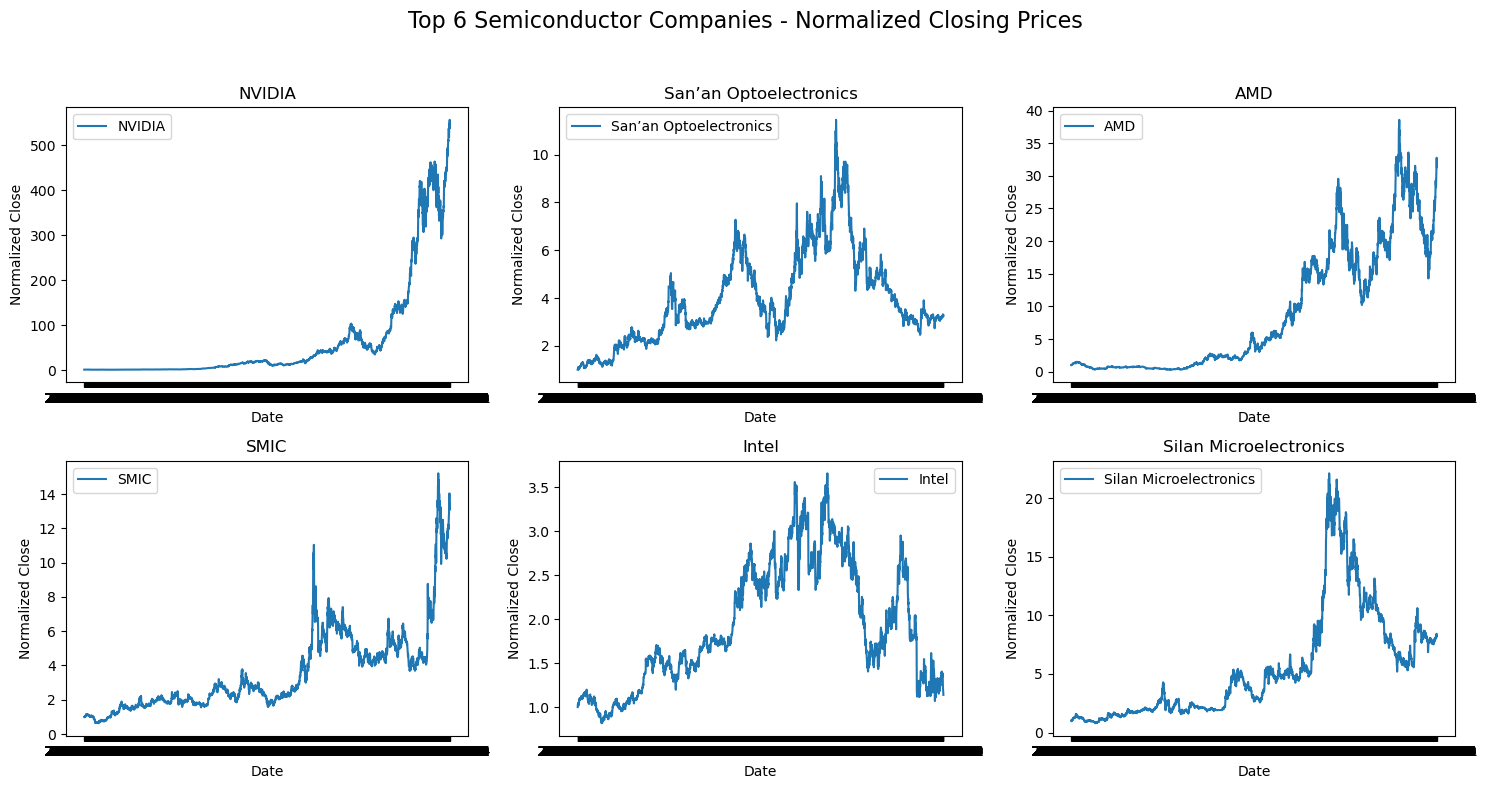

In [3]:
d['norm_close'] = d.groupby("company_name")['close'].transform(lambda x: x / x.iloc[0])
top_companies = d.groupby("company_name")["volume"].mean().sort_values(ascending=False).head(6).index
d_top = d[d["company_name"].isin(top_companies)]

plt.figure(figsize=(15, 8))

for i, company in enumerate(top_companies, 1):  
    plt.subplot(2, 3, i)   # 2 rows, 3 cols
    subset = d_top[d_top["company_name"] == company]
    plt.plot(subset["date"], subset["norm_close"], label=company)

    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Normalized Close")
    plt.legend()

plt.suptitle("Top 6 Semiconductor Companies - Normalized Closing Prices", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for main title
plt.show()

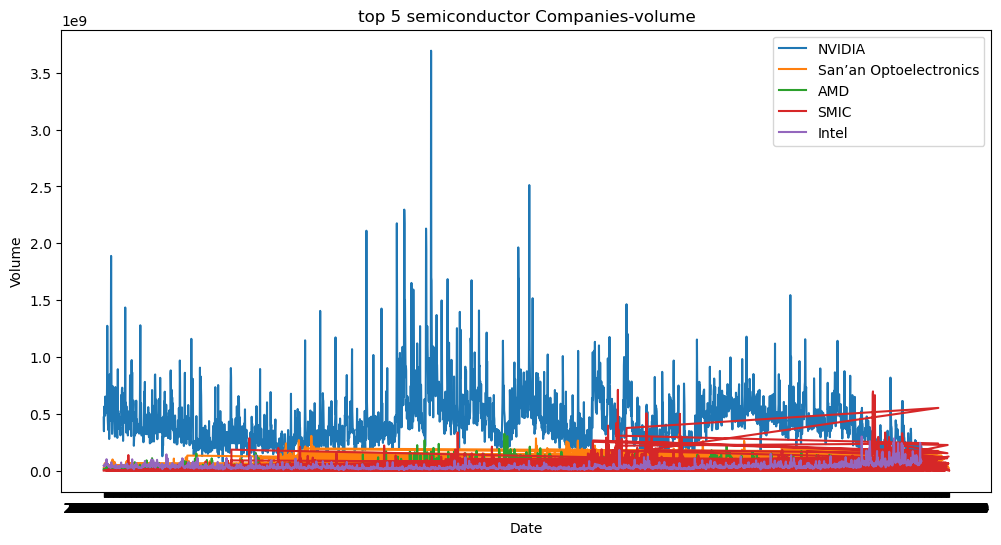

In [11]:

plt.figure(figsize=(12,6))
for company in top_companies:
    subset=d_top[d_top["company_name"]==company]
    plt.plot(subset["date"],subset["volume"],label=company)

plt.legend()
plt.title("top 5 semiconductor Companies-volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

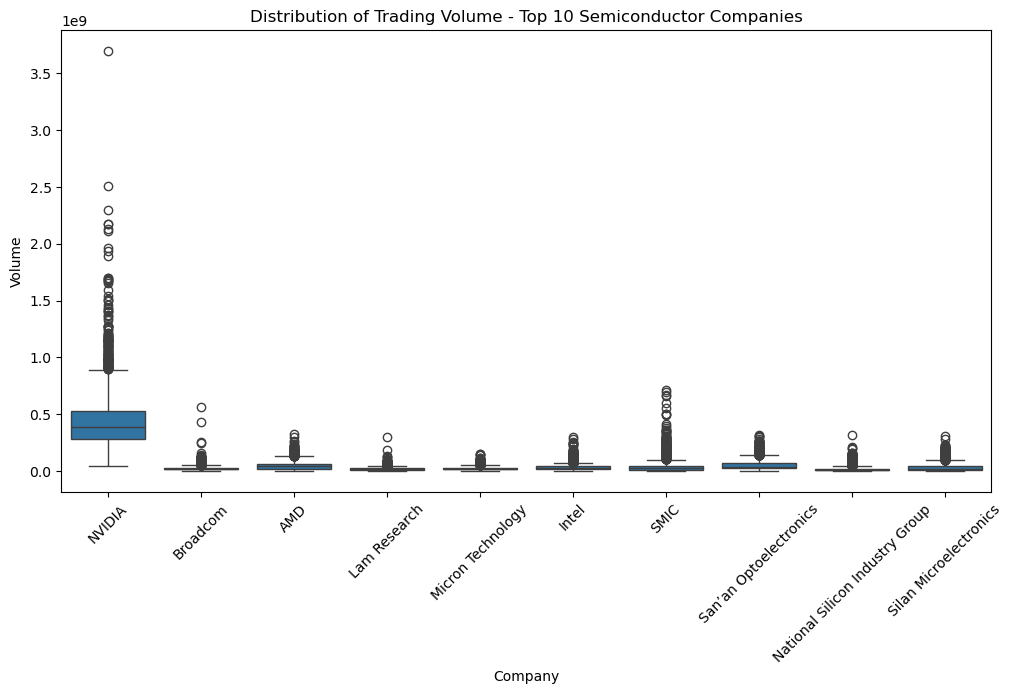

In [12]:
top_companies_1=d.groupby("company_name")["volume"].mean().sort_values(ascending=False).head(10).index
d_top_1 = d[d["company_name"].isin(top_companies_1)]

plt.figure(figsize=(12,6))
sns.boxplot(x="company_name", y="volume", data=d_top_1)
plt.xticks(rotation=45)
plt.title("Distribution of Trading Volume - Top 10 Semiconductor Companies")
plt.ylabel("Volume")
plt.xlabel("Company")
plt.show()

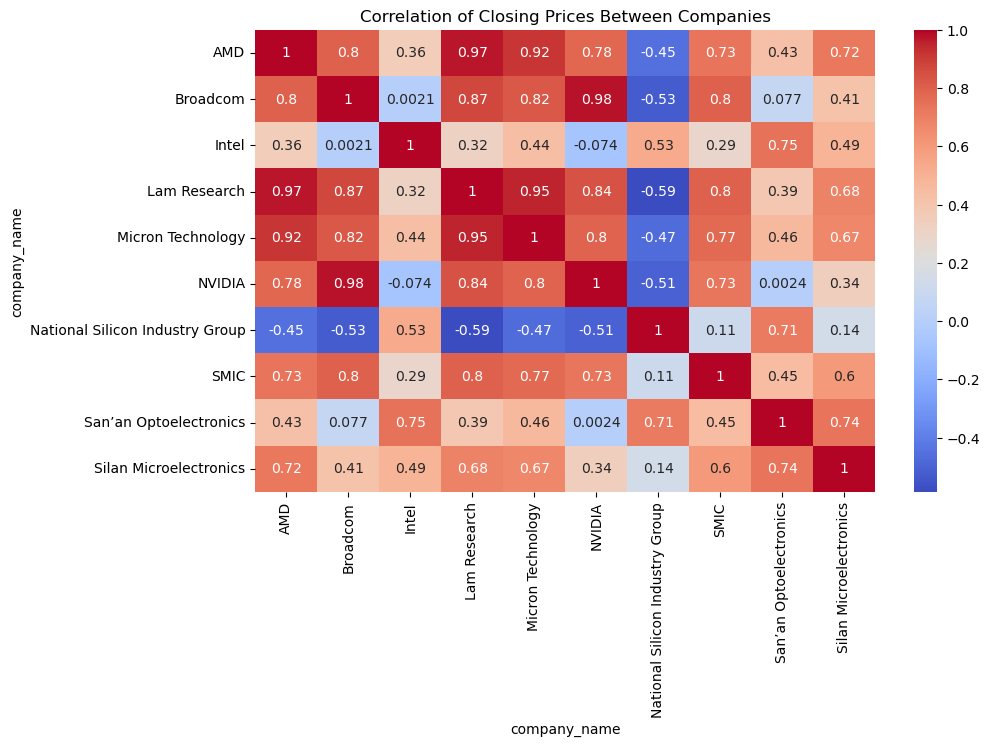

In [13]:
pivot_prices = d_top_1.pivot(index="date", columns="company_name", values="close")
corr = pivot_prices.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Closing Prices Between Companies")
plt.show()